In [5]:
__author__ = 'Alysa Obertas'
__email__ = 'obertas@astro.utoronto.ca'

import numpy as np
import rebound
import matplotlib.pyplot as plt
import matplotlib
import random

In [6]:
#######################################################################
## read initial condition file

infile = "../generate-and-run-systems/initial_conditions.npz"

ic = np.load(infile)

P_sort = ic['P_rand'] # periods for Nsims test particles, sorted in ascending order (REBOUND time)
e_sort = ic['e_rand'] # eccentricities for Nsims test particles, sorted in ascending order
inc_sort = ic['inc_rand'] # inclinations for Nsims test particles, sorted in ascending order (radians)
pomega_sort = ic['pomega_rand'] # longitudes of periapsis for Nsims test particles, sorted in ascending order (radians)

In [7]:
#######################################################################
## read spock probabilities file

outfile = "../spock-stability/probs-all-second-run-feb-6.npz"

spock_probs = np.load(outfile)

probs = spock_probs['probs']

(5.656119662308048e-06, 6.597252891879139)

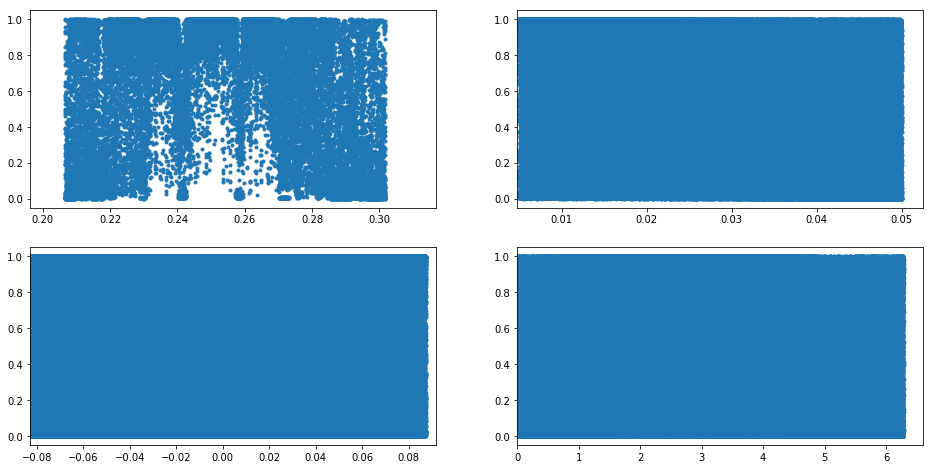

In [8]:
fig, ax = plt.subplots(figsize=(16,8))

Ne = 30
NP = 30
emax = 0.5
Pmax = 0.5

e = np.linspace(0, emax, Ne)
P = np.linspace(0, Pmax, NP)

de1 = e1_lin[1]-e1_lin[0]
de2 = e2_lin[1]-e2_lin[0]

# pcolormesh takes the boundaries of each cell in X and Y, so need to offset by half dX, and add one at end at X[-1]+dX/2
e1g = [e - de1/2 for e in e1] + [e1_lin[-1]+de1/2]
e2g = [e - de2/2 for e in e2] + [e2_lin[-1]+de2/2]

X, Y = np.meshgrid(e1g, e2g)

Z = np.zeros((Ne2, Ne1)) # shape = (rows, col) so (Y,X)
for i, e1v in enumerate(e1):
    for j, e2v in enumerate(e2):
        Z[j,i] = np.mean()

z_min, z_max = -abs(Z).max(), abs(Z).max()

im = ax.pcolormesh(X, Y, Z, cmap='winter')
fig.colorbar(im)
ax.set_xlabel('e1')
ax.set_ylabel('e3')

fig, ax = plt.subplots()
im = ax.pcolormesh(X, Y, Z, cmap='winter')
fig.colorbar(im)
ax.set_xlabel('e1')
ax.set_ylabel('e3')

ax[0][0].plot(P_sort[np.logical_and(inc_sort >= 3 * np.pi/180, inc_sort < 5 * np.pi/180)], probs[np.logical_and(inc_sort >= 3 * np.pi/180, inc_sort < 5 * np.pi/180)], '.')
ax[0][0].set_xlim(0.95*np.min(P_sort), 1.05*np.max(P_sort))

ax[0][1].plot(e_sort, probs, '.')
ax[0][1].set_xlim(0.95*np.min(e_sort), 1.05*np.max(e_sort))

ax[1][0].plot(inc_sort, probs, '.')
ax[1][0].set_xlim(0.95*np.min(inc_sort), 1.05*np.max(inc_sort))

ax[1][1].plot(pomega_sort, probs, '.')
ax[1][1].set_xlim(0.95*np.min(pomega_sort), 1.05*np.max(pomega_sort))